In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
import matplotlib.image as mpimg

In [0]:
c1 = os.listdir('/content/drive/My Drive/Image_2/Input/Dataset/train/category1')
c2 = os.listdir('/content/drive/My Drive/Image_2/Input/Dataset/train/category2')
c3 = os.listdir('/content/drive/My Drive/Image_2/Input/Dataset/train/category3')
c4 = os.listdir('/content/drive/My Drive/Image_2/Input/Dataset/train/category4')

In [0]:
categories = [c1, c2, c3, c4]

In [0]:
X_train = []
Y_train = []

In [43]:
for i in range(len(categories)):
    dirname = '/content/drive/My Drive/Image_2/Input/Dataset/train/category'+str(i+1)+'/'
    for e in categories[i]:
        try:
            img = mpimg.imread(dirname+e)
            X_train.append(img)
            Y_train.append(i-1)
        except OSError:
            print("Image not found")

Image not found
Image not found
Image not found
Image not found


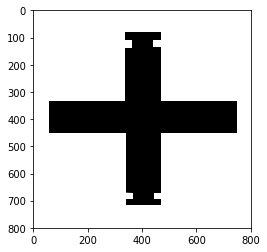

2


In [44]:
plt.imshow(X_train[-1])
plt.show()
print(Y_train[-1])

In [0]:
len(X_train)
X_train = X_train[102:]
X_train = np.asarray(X_train)

In [0]:
Y_train = np.asarray(Y_train[102:])

In [47]:
len(Y_train)+102

440

In [48]:
len(X_train)+102

440

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train)

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [0]:
model = Sequential()

In [0]:
#add model layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(800,800,3)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 253 samples, validate on 85 samples
Epoch 1/3
253/253 [==============================] - 158s 626ms/step - loss: 2.4576 - acc: 0.5138 - val_loss: 0.5621 - val_acc: 0.7412
Epoch 2/3
253/253 [==============================] - 159s 627ms/step - loss: 0.1312 - acc: 0.9447 - val_loss: 0.3493 - val_acc: 0.8588
Epoch 3/3
253/253 [==============================] - 158s 624ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3467 - val_acc: 0.8824


In [0]:
output = model.predict(X_test[:])

In [0]:
def getVal(i):
  return list(i).index(max(i))

In [0]:
right = 0
wrong = 0
for i in range(len(output)):
  if getVal(output[i]) == getVal(y_test[i]):
    right += 1
  else:
    wrong += 1

In [0]:
accuracy = (right/(right+wrong))*100

In [92]:
accuracy

88.23529411764706